# Ensemble Technique

Why Bagging Useful:
 - because the bagging has the low bias and low variance 
 
 
 
 The main idea behind bagging is to reduce the variance of a model by introducing randomness in the dataset. By sampling with replacement, each subset has a slightly different distribution than the original dataset, which introduces diversity in the decision trees. Therefore, bagging can reduce overfitting and improve the accuracy of a model.

In [ ]:
if  we are not getting good accuracy on training data means your model not able to capture the pattern of the training data set then we call it the model is biased(High bias)
if the your model is not giving the consitance result even on the small chang in data then model ,we call it the variance

Technique which combines several base models (Tree) in order to produce optimal predictve model

In [ ]:
DT(max_depth=None),SVM,KNN as the Low Bias and High Variace issues

# Two Methods

In [ ]:
1. Bagging(row sampling) > Follows ( Parallel Approach)(MODEL SHOULD BE SAME(base model)) and every model train on different random data set(subset) of origin data set
  Bagging >> Bootstraping + Aggregating
    Bootstraping : Creating the random subset of data and train the base model
    Aggregating  : Take the majority or mean of the accuracy of each model
    1. Random Forest

    and bagging is not to restricated to the decision trees


2. Boosting > Follows ( Sequentianl Approach)
   a) Adaboost
   b) Gradient Boost
   c) XGBoost
   d) CatBoost

In [ ]:
Bootstraping : Creating the random subset of data and train the base model
    
    suppose we have 10k recored:
        we do the random row sampling of the 2k data and pass to the model1
    again random row sampling and pass to the next model2
Note: when we pass to the random row sample to model2 then some of the record may or may not be same in as we passed in model1

In [ ]:
if suppose we have noise data point it may lead to the inconsistance in result(variance)
but if we use the bagging with the boostrapping 
then this data point will be random distributed to base model it will help to reduce the variance

Why Bagging Useful:
 - because the bagging has the low bias and low variance 

- when the new data point comes in model then it getting the distribute to - your base model because random subset 
- so it mean in your data set has the less variance 
- bcz of this reason we can achieve the low bias and low variance

### Pasting

In [ ]:
Pasting(row sampling) :it same as the bagging only difference in sample subset ,Sampling is done without replacement
    means row will not be repeated

## Random Subspaces

 Random Subspaces (column sampling) : with and Without sampling wilt columns

### Random Patches :
    Sampling with row and columsn

# Random Forest
Forest of Trees

#### difference between the bagging and Random Forest
 ### Bagging(base_estimator): option is available
- does not exclusively use decision trees as base learners; it can use a variety of base learners, including decision trees, 
- While decision trees are commonly used as base learners in bagging, other types of models can also be used, such as linear models, support vector machines, or even neural networks.


### Random Forest : Base_estimator is not avavilabel by default decision tree

- Random forest is a modification of bagging that further improves the performance of the model by introducing randomness in the feature selection process. In random forest, we create multiple decision trees using a subset of the original features. In each node of the tree, instead of using all the features, we randomly select a subset of features to split the data. This process is repeated for each node, resulting in a decision tree that uses a subset of the features.

- By using a subset of the features at each node, random forest introduces diversity in the decision trees, which further reduces the variance of the model. Moreover, the feature selection process prevents the trees from being highly correlated, which is a problem in bagging. Therefore, the random forest can improve the accuracy of a model by reducing overfitting and increasing the diversity of the trees.

The main difference between bagging and random forest lies in the way they introduce randomness in the dataset. Bagging introduces randomness by sampling with replacement, while random forest introduces randomness by using a **subset of features** for each tree.

what if we pass the all base model as decision tree in baggingClassifier
can we call it Random Forest :Answere is no
    why 
    
    bagging: tree level sampling            
                                         
        suppose we perform the column       
        sampling (features_sampling)  total_features=10                     
        features_sampling=2
        then random 
        2 feature will select and
        your model-1  will be train
        again for model-2 sampling will happen
        and so on 
   
- RandomForest : node level sampling(for creating each node sampling will be happen)
 - 2 feature selected >    
  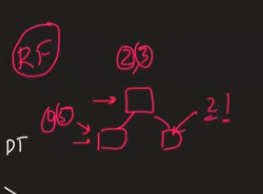
  
  - for every not node the sampling is happen 
  - this the biggest differnece between the random forest and bagging

# RANDOM FOREST FOR CLASSIFCATION  PROBLEM

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [2]:
# pip install --user imblearn

In [3]:
# imbalancing of data is available in only in Classification problem

In [4]:
df =pd.read_csv("E:/Data_Science/PYTHON_NOTES/CSV/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

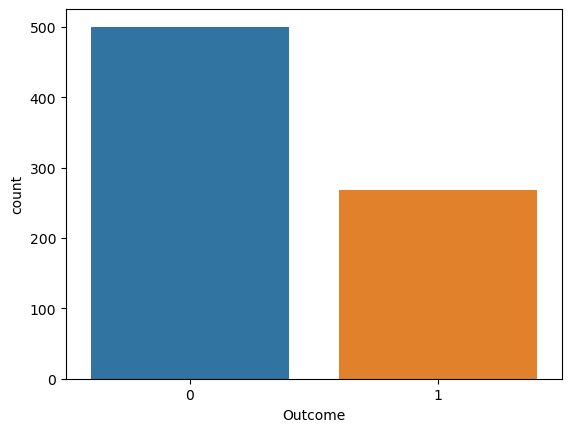

In [7]:
sns.countplot(x=df["Outcome"])

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Train_test_Split

In [9]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']

In [10]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)


# Model Training with Random forset

In [11]:
Random_Forset = RandomForestClassifier()
Random_Forset.fit(x_train,y_train)

RandomForestClassifier()

# Training

In [12]:
# Training
y_pred_train =Random_Forset.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[400   0]
 [  0 214]]
accuracy_score
 1.0
classification_report_
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# Testing

In [13]:
# Testing
y_pred_test =Random_Forset.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[91  9]
 [25 29]]
accuracy_score
 0.7792207792207793
classification_report_
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



# Model Training  for  Bagging With Base Model

In [41]:
bagging = BaggingClassifier(max_samples=.5,# The number of samples to draw from X to train each base estimator (with replacement  by default base model is decision trees
                           n_estimators=10) # number of base_model  
bagging.fit(x_train,y_train)
pred = bagging.predict(x_train)
print("Accuracy for training data set",accuracy_score(y_train,pred))


pred = bagging.predict(x_test)
print("Accuracy for Testing data set",accuracy_score(y_test,pred))


Accuracy for training data set 0.9055374592833876
Accuracy for Testing data set 0.7467532467532467


# change the base model to svm in bagging

In [46]:
from sklearn.svm import SVC
bagging = BaggingClassifier(base_estimator=SVC(),
                            max_samples=.25,
                           n_estimators=10,
                           )  # by default base model is decision trees
bagging.fit(x_train,y_train)
pred = bagging.predict(x_train)
print("Accuracy for training data set base model is SVC",accuracy_score(y_train,pred))


pred = bagging.predict(x_test)
print(f"Accuracy for Testing data set base model is SVC ",accuracy_score(y_test,pred))

Accuracy for training data set base model is SVC 0.7231270358306189
Accuracy for Testing data set base model is SVC  0.6883116883116883


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Pasting
 boostrap=False (sampling without replacement)
 record will not repeated

In [48]:
from sklearn.svm import SVC
bagging = BaggingClassifier(base_estimator=SVC(),
                            max_samples=.25,
                           n_estimators=10,
                           bootstrap=False)  
bagging.fit(x_train,y_train)
pred = bagging.predict(x_train)
print("Accuracy for training data set base model is SVC",accuracy_score(y_train,pred))


pred = bagging.predict(x_test)
print(f"Accuracy for Testing data set base model is SVC ",accuracy_score(y_test,pred))

Accuracy for training data set base model is SVC 0.739413680781759
Accuracy for Testing data set base model is SVC  0.7077922077922078


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Random Subspaces

In [67]:
from sklearn.svm import SVC
bagging = BaggingClassifier(base_estimator=SVC(),
                            max_samples=1,# take all record 
                           n_estimators=20,
                            max_features=0.1,#take half features
                           bootstrap=False,
                           bootstrap_features=True,
                           random_state=42) # to create randomness in features 
bagging.fit(x_train,y_train)
# pred = bagging.predict(x_train)
# print("Accuracy for training data set base model is SVC",accuracy_score(y_train,pred))


# pred = bagging.predict(x_test)
# print(f"Accuracy for Testing data set base model is SVC ",accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ValueError: Invalid input - all samples with positive weights belong to the same class.

# Random Patches
columns and row sampling with replacement

In [69]:
from sklearn.svm import SVC
bagging = BaggingClassifier(base_estimator=SVC(),
                            n_estimators=10,
                            max_samples=.25,
                            bootstrap=True,
                           max_features=.5,
                           bootstrap_features=True,
                           random_state=42)  
bagging.fit(x_train,y_train)
pred = bagging.predict(x_train)
print("Accuracy for training data set base model is SVC",accuracy_score(y_train,pred))


pred = bagging.predict(x_test)
print(f"Accuracy for Testing data set base model is SVC ",accuracy_score(y_test,pred))

Accuracy for training data set base model is SVC 0.6889250814332247
Accuracy for Testing data set base model is SVC  0.6753246753246753


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## OOB Socre

 "replacement" means that rows (observations) can be repeated within each bootstrap 

In [ ]:
out of bag sample:
    While making the samples, data points were chosen randomly and with replacement, and the data points which fail to be a part of that particular sample are known as OUT-OF-BAG points.
 
63 
37 :can be oob

The Out of Bag data will  be treated as a validation split for the random forest model.

# Model Training With Decision Tree

In [12]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
# Training
y_pred_train =Decision_Tree.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[400   0]
 [  0 214]]
accuracy_score
 1.0
classification_report_
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [14]:
# Testing
y_pred_test =Decision_Tree.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[79 21]
 [29 25]]
accuracy_score
 0.6753246753246753
classification_report_
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



# Hyperparameter Tunnig

In [47]:
import warnings
warnings.filterwarnings("ignore")
RF_Model =RandomForestClassifier()
hyperparameter ={"n_estimators":np.arange(10,20),
                 'criterion':['gini','Entropy'], 
                 'max_depth':np.arange(4,10),
                 'min_samples_split':np.arange(3,10),
                 'min_samples_leaf':np.arange(3,10),
                 "max_features":['sqrt','log2'],
                 'random_state':[41,42,43,44,45],
                 "oob_score":[True]}
rdscv=RandomizedSearchCV(RF_Model,hyperparameter,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'Entropy'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

>n_estimators: This specifies the number of decision trees in the random forest.
criterion: This specifies the criterion used to split nodes in the decision trees. The options are 'gini' for the Gini impurity and 'entropy' for the information gain.

>max_depth: This specifies the maximum depth of the decision trees in the random forest. A larger maximum depth can lead to more complex trees, which may improve performance but can also increase the risk of overfitting.

>min_samples_split: This specifies the minimum number of samples required to split a node in the decision trees.

>min_samples_leaf: This specifies the minimum number of samples required to be at a leaf node in the decision trees.

>max_features: This specifies the maximum number of features to consider when looking for the best split at each node in the decision trees. The options are 'sqrt', which uses the square root of the number of features, and 'log2', which uses the logarithm of the number of features.

>random_state: This specifies the random seed used by the random forest classifier. Setting the random seed can help ensure that the results of the model are reproducible.

>oob_score: This specifies whether to use out-of-bag samples to estimate the generalization accuracy of the model. Out-of-bag samples are samples that are not used for training and can be used to estimate the performance of the model on new data.




Regenerate response

unseen data. This can be useful as an alternative to using a separate validation set to estimate the generalization error, because it allows the model to use all of the data for training, rather than reserving a portion of the data for validation.

In [53]:
rdscv.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)

In [55]:
RF_Model = RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)
RF_Model.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=18, oob_score=True,
                       random_state=44)

In [57]:
# Training
y_pred_train =RF_Model.predict(x_train)
confusion_matrix_ =confusion_matrix(y_train,y_pred_train)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_train,y_pred_train)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_train,y_pred_train)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[364  36]
 [ 59 155]]
accuracy_score
 0.8452768729641694
classification_report_
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       400
           1       0.81      0.72      0.77       214

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.84      0.85      0.84       614



In [56]:
# Testing
y_pred_test =RF_Model.predict(x_test)
confusion_matrix_ =confusion_matrix(y_test,y_pred_test)
print('confusion_matrix\n',confusion_matrix_)

accuracy_score_=accuracy_score(y_test,y_pred_test)
print('accuracy_score\n',accuracy_score_)

classification_report_=classification_report(y_test,y_pred_test)
print('classification_report_\n',classification_report_)

confusion_matrix
 [[89 11]
 [24 30]]
accuracy_score
 0.7727272727272727
classification_report_
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



# Feature Selection 

In [58]:
array =RF_Model.feature_importances_
array
# every feture are important mean every feature are particpating for making prediction

array([0.04818209, 0.3452842 , 0.04796578, 0.05077284, 0.0478164 ,
       0.19111659, 0.08914948, 0.17971261])

<AxesSubplot:>

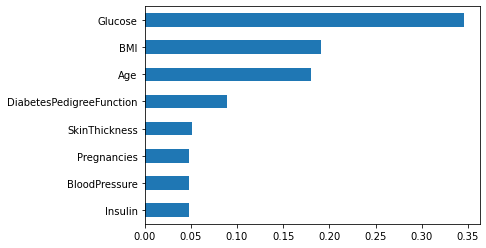

In [59]:
array = RF_Model.feature_importances_
Data =pd.Series(array,index=x.columns)
Data.sort_values().plot(kind="barh")

In [61]:
RF_Model.oob_score_

0.7361563517915309

In [62]:
RF_Model.oob_score

True

# Sampling technics

In [63]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [64]:
y_train.value_counts()

0    400
1    400
Name: Outcome, dtype: int64

In [ ]:
Random forest can be train on row sampling,column sampling  and combination of both

# RANDOM FOREST WITH REGRESSOR PROBLEM

In [70]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [83]:
x=data
y=target

# train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)


# model Training

In [85]:
decision_tree =DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

# Model Evalution 

In [30]:
y_pred_train = decision_tree.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

0.0
0.0
1.0


In [31]:
y_pred_test = decision_tree.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)

2.7490196078431377
15.274313725490197
0.858673205606419


# Randomforest

In [91]:
Ran_forest = RandomForestRegressor(
    n_estimators=1000, # number of tree
    
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0, # this will cotrol the column sampling
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True, # this with replacement
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=0.7, # 70 this will control the number of record to be sampled from X
)
Ran_forest.fit(x_train,y_train)

RandomForestRegressor(max_samples=0.7, n_estimators=1000)

In [92]:
y_pred_train = Ran_forest.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

1.0976393564356497
2.6507354122524847
0.9661637203779745


In [93]:
y_pred_test = Ran_forest.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)


2.4442490196078426
10.340664305686252
0.9043221866142557


# Hyperparameter Tuning with RandomForestRegressor()

In [ ]:
max_features =     - If "sqrt", then `max_features=sqrt(n_features)`.
    - If "log2", then `max_features=log2(n_features)`.
    - If None or 1.0, then `max_features=n_features`.

In [98]:
n_features = x.shape[1]
n_features

13

In [100]:
np.sqrt(x.shape[1])

3.605551275463989

In [101]:
np.log2(x.shape[1])

3.700439718141092

from above obseration if we have 13 feature and we use them max_feature as the sqrt and log then only 3 features will be considered for the spliting of tree

In [35]:
import warnings
warnings.filterwarnings("ignore")
rf_reg_hype = RandomForestRegressor()
hyper = {"n_estimators":np.arange(10,20),
         'criterion':['mse','mae'],
         'max_depth':np.arange(4,10),
         'min_samples_split':np.arange(3,10),
         'min_samples_leaf': np.arange(3,10),
         'max_features':['sqrt','log2'],
         'random_state':[41,42,43,44,45],
         'oob_score':[True]}
rdscv =RandomizedSearchCV(rf_reg_hype,hyper,cv=5)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

In [36]:
rdscv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=7, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=7, n_estimators=14,
                      oob_score=True, random_state=44)

In [37]:
updated=RandomForestRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=5, n_estimators=11,
                      oob_score=True, random_state=45)
updated.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=7, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=5, n_estimators=11,
                      oob_score=True, random_state=45)

In [19]:
y_pred_train = updated.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

1.9542979297929792
9.03986058833156
0.8846074001965383


In [20]:
y_pred_test = updated.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)


3.01319073083779
18.242223707664884
0.8312123840357923


In [40]:
# plt.figure(figsize=(400,250))
# plot_tree(updated,feature_names=x.columns,filled=True)
# plt.savefig("Random Forest Decision Tree with regressor.png")

# hyperparameter Tunning with Decision Tree

In [42]:
import warnings
warnings.filterwarnings("ignore")
dec_trr_hype =DecisionTreeRegressor()
hyper = {'criterion':['mse','mae'],
         'max_depth':np.arange(4,10),
         'min_samples_split':np.arange(3,10),
         'min_samples_leaf': np.arange(3,10),
         'random_state':[41,42,43,44,45]
        }
rdscv =RandomizedSearchCV(dec_trr_hype,hyper,cv=5)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [41, 42, 43, 44, 45]})

In [43]:
rdscv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=5,
                      min_samples_split=4, random_state=41)

In [ ]:
Further To do check accuracy and you can use prunning (only in decision Tree)